In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
import os

In [3]:
df = pd.read_csv("../../../cryptoData/BTC_15m_data.csv")

In [4]:
df

,date,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061
1,2017-08-17 04:15:00,4261.48,4270.41,4261.32,4261.45,9.119865
2,2017-08-17 04:30:00,4280.00,4310.07,4267.99,4310.07,21.923552
3,2017-08-17 04:45:00,4310.07,4313.62,4291.37,4308.83,13.948531
4,2017-08-17 05:00:00,4308.83,4328.69,4304.31,4304.31,5.101153
...,...,...,...,...,...,...
155486,2022-01-28 14:45:00,36684.11,36828.38,36600.00,36759.65,560.007760
155487,2022-01-28 15:00:00,36759.65,37198.00,36682.24,37149.99,649.317780
155488,2022-01-28 15:15:00,37150.00,37300.00,36925.89,36988.91,1061.113920
155489,2022-01-28 15:30:00,36985.43,37115.32,36874.46,37022.42,452.420950


In [5]:
df_headers = df.columns

<p> Removing the date column </p> 

In [8]:
float_data = df.values[:, 1: ,].astype(float)

<Strong> Creating A Plot For Open Prices. </Strong>

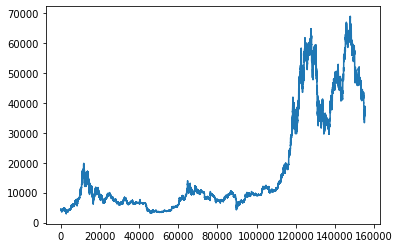

In [9]:
openPrice = float_data[:,1]
plt.plot( range ( len (openPrice) ) , openPrice )

<p> From the graph we can see that the mean is not constant over time , standard deviation is not constant either.End of the series is more variable than the beginning.  Non stationary data. As the stock grows it increases in volitility. <p>

<Strong> Plot of the first 120 hours on launch on Binance.</Strong>

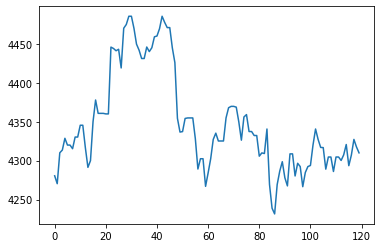

In [10]:
plt.plot(range(120) , openPrice[:120])

<Strong> Breaking off into Training , Validation and Test sets. <Strong>

In [12]:
array = df.to_numpy()[:,1:]

In [14]:
training = array[:105000]
validation = array[105000:135000]
test = array[135000:]

<Strong> Creating The Prediction and Actual Target Values From Validation Set.</Strong>

<p> 
We have to move the target numpy array up one , as the result is the prediction for the timeseries (n+1) . Ex(If price is going up today and we predict it will go up tomorrow , result is found out tomorrow).
    
We have to delete the the first and last index of actual_targets , as this would be the same as shifting the whole array up one. 

The reason for deleting the last column in validation_prediction is because we cannot get the actual value (tomorrow) for a prediction we made today .
</p>

In [15]:
#Taking the last one off prediction for ^ reason
validation_predictions = (validation[:,0] > validation[:,3])[:-1].astype(int)

#Actual targets are the timeslot after , so if 
validation_targets = (validation[:,0] > validation[:,3])[1:].astype(int)

In [16]:
def naive_method(prediction , targets):
    
    length = len(prediction)
    correct = 0
    
    for i , pred in enumerate(prediction):
        
        if pred == targets[i]:
            
            correct = correct + 1
    
    print ((correct/length) * 100 )

In [17]:
naive_method(validation_predictions, validation_targets)

47.451581719390646


<p> Out of the 29,999 examples in validation_data , we got a little over 47% correct . This is no good as we could just use a constant class prediction as below that would achieve better results. </p>

In [21]:
predict_up = validation_targets == 1 
predict_down = validation_targets == 0

percent_up = ((predict_up.sum() / len(validation_targets)) * 100)
percent_down = ((predict_down.sum()/ len(validation_targets)) * 100)

print("Model that predicts price will always go up = " + str(percent_up) + ".")
print("Model that predicts price will always go down = " + str(percent_down) + ".")

Model that predicts price will always go up = 49.668322277409246.
Model that predicts price will always go down = 50.331677722590754.


<Strong> A basic machine learning approach. </Strong>

<p> I am going to look into cheap machine learning models such as this small densley connected netowrk before looking into complicated and computationally expensive TCN models. </p>

In [8]:
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1]))) 
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

NameError: name 'lookback' is not defined